# Funciones de distribución de probabilidades

## Distribución uniforme
Generación de números aleatorios igualmente probables.

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
a = 1 # límite inferior
b = 1000 # límite superior
n = 1000000 # número de muestras
data = np.random.uniform(a, b, n)

(array([100125.,  99954., 100370.,  99595.,  99725.,  99866., 100267.,
        100226., 100028.,  99844.]),
 array([  1.00032623, 100.90015922, 200.7999922 , 300.69982519,
        400.59965817, 500.49949116, 600.39932414, 700.29915713,
        800.19899011, 900.0988231 , 999.99865608]),
 <a list of 10 Patch objects>)

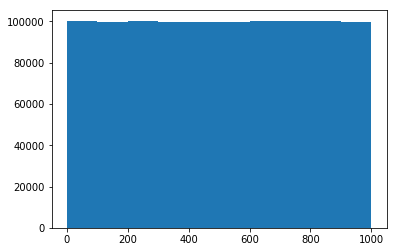

In [30]:
%matplotlib inline
plot = plt.hist(data)
plot

## Distribución normal

In [31]:
data = np.random.randn(1000000)

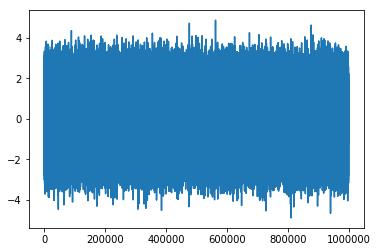

In [32]:
x = range(1, 1000001)
plt.plot(x, data)

(array([4.60000e+01, 1.56900e+03, 2.28790e+04, 1.35657e+05, 3.32878e+05,
        3.38113e+05, 1.42655e+05, 2.43740e+04, 1.78600e+03, 4.30000e+01]),
 array([-4.89830357, -3.92196055, -2.94561753, -1.9692745 , -0.99293148,
        -0.01658845,  0.95975457,  1.9360976 ,  2.91244062,  3.88878364,
         4.86512667]),
 <a list of 10 Patch objects>)

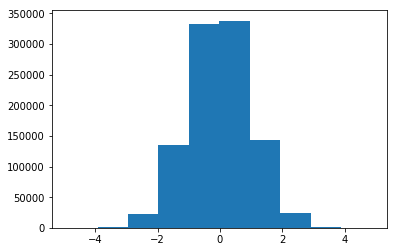

In [33]:
plt.hist(data)

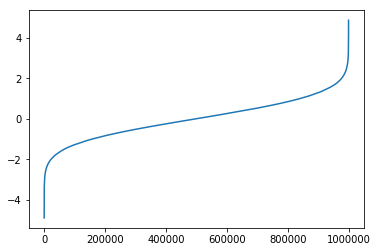

In [34]:
plt.plot(x, sorted(data))

(array([  29.,  148.,  715., 1879., 2827., 2585., 1285.,  445.,   83.,
           4.]),
 array([-3.28876587, -1.45496253,  0.37884081,  2.21264415,  4.04644749,
         5.88025083,  7.71405418,  9.54785752, 11.38166086, 13.2154642 ,
        15.04926754]),
 <a list of 10 Patch objects>)

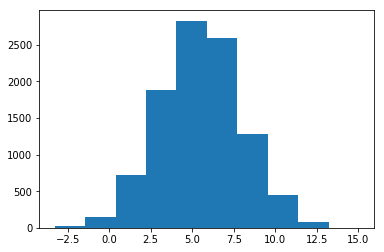

In [41]:
mu = 5.5
sd = 2.5
z = np.random.randn(10000)
data = mu + sd * z # z = (X - mu) / sd -> N(0, 1), X = mu + sd * z
plt.hist(data)

In [42]:
data = np.random.randn(2,4)
data

array([[ 0.78636359,  0.70859493,  0.97303162, -2.0748133 ],
       [-1.97355627,  1.50621962,  0.79388646, -0.0632883 ]])

## La simulación de Monte Carlo

* Generar dos números aleatorios uniformes x y entre 0 y 1 en total 1000 veces

* Calcular x * x + y * y

    * Si el valor es inferior a 1 -> estamos dentro del círculo
    
    * Si el valor es superior a 1 -> estamos fuera del círculo

* Calcular el número total de veces que están dentro del círculo y dividir entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.

* Utilizar dicha probabilidad para aproximar el valor de π.

* Repetir el experimento un número suficiente de veces (por ejemplo, 100), para obtener (100) diferentes aproximanciones de π.

* Calcular el promedio de los 100 experimentos anteriores para dar un valor final de π.

3.1418768


(3.1418768, [<matplotlib.lines.Line2D at 0x1ccba9b4e48>])

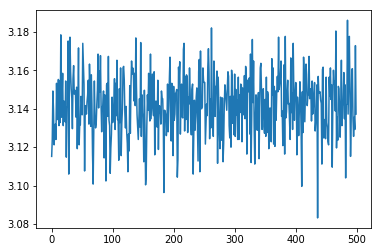

In [53]:

def pi_montecarlo(n, n_exp):
    # n = número de puntos
    # n_exp = número de experimentos
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0, 1, n).tolist()
        y = np.random.uniform(0, 1, n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z <= 1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg / n_exp
    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

pi_montecarlo(10000, 200)

## Dummy Data Sets

In [62]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }
)

In [63]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.001914,1.499809,18.507609
std,1.000011,2.500058,7.796078
min,-4.644703,-10.648854,5.000017
25%,-0.674097,-0.183359,11.752778
50%,0.002169,1.498269,18.502019
75%,0.677961,3.186402,25.264689
max,5.130386,13.518516,31.999936


(array([1.36000e+02, 3.40500e+03, 3.97760e+04, 1.87768e+05, 3.64221e+05,
        2.93462e+05, 9.73290e+04, 1.31480e+04, 7.36000e+02, 1.90000e+01]),
 array([-4.64470301, -3.66719412, -2.68968522, -1.71217633, -0.73466744,
         0.24284146,  1.22035035,  2.19785924,  3.17536814,  4.15287703,
         5.13038592]),
 <a list of 10 Patch objects>)

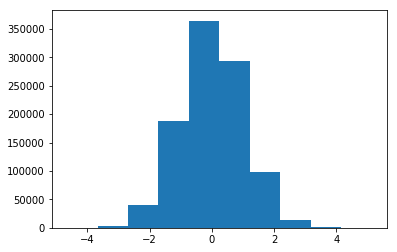

In [65]:
plt.hist(data['A'])

(array([4.90000e+01, 1.68900e+03, 2.33510e+04, 1.35266e+05, 3.29520e+05,
        3.36695e+05, 1.45371e+05, 2.59690e+04, 2.03400e+03, 5.60000e+01]),
 array([-10.64885386,  -8.23211684,  -5.81537982,  -3.3986428 ,
         -0.98190578,   1.43483124,   3.85156826,   6.26830527,
          8.68504229,  11.10177931,  13.51851633]),
 <a list of 10 Patch objects>)

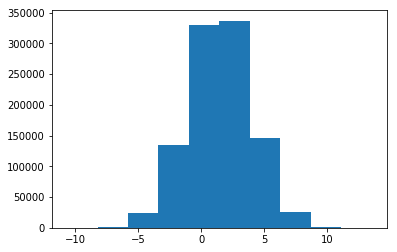

In [66]:
plt.hist(data['B'])

(array([ 99690., 100417.,  99812.,  99658., 100352.,  99703.,  99565.,
        100406., 100180., 100217.]),
 array([ 5.00001727,  7.70000917, 10.40000107, 13.09999296, 15.79998486,
        18.49997676, 21.19996866, 23.89996056, 26.59995246, 29.29994435,
        31.99993625]),
 <a list of 10 Patch objects>)

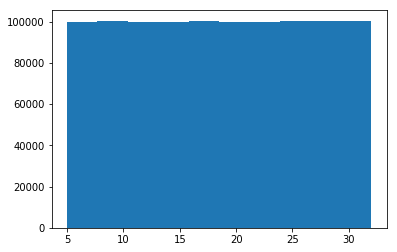

In [67]:
plt.hist(data['C'])

In [68]:
data = pd.read_csv('../datasets/customer-churn-model/Customer Churn Model.txt')
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [71]:
column_names = data.columns.values.tolist()

In [74]:
a = len(column_names)
a

21

In [78]:
new_data = pd.DataFrame(
    {
        'Column Name' : column_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0, 1, a),
    }, index = range(42, 42 + a)
)

new_data

,A,B,Column Name
42,-0.408527,0.725521,State
43,0.941753,0.994538,Account Length
44,-0.865167,0.815304,Area Code
45,-0.019250,0.193304,Phone
46,0.778100,0.224892,Int'l Plan
47,-0.793121,0.422961,VMail Plan
48,-0.310718,0.459471,VMail Message
49,-0.728752,0.792202,Day Mins
50,1.365870,0.413674,Day Calls
51,-0.832505,0.738110,Day Charge
